In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, recall_score
from pandas import DataFrame
import seaborn as sns
import string

import nltk
from wordcloud import WordCloud, STOPWORDS
nltk.download('stopwords')
#nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Preprocessing Dataset

In [ ]:
# clickbait = pd.read_csv("clickbait.csv")
# notclickbait = pd.read_csv("notClickbait.csv")

# clickbait_positive = [1 for i in range(clickbait.shape[0])]
# clickbait_negative = [0 for i in range(notclickbait.shape[0])]

# clickbait["isClickbait"] = clickbait_positive
# notclickbait["isClickbait"] = clickbait_negative

# dataset = pd.concat([clickbait, notclickbait])

# dataset = dataset.drop(['ID', 'Favorites'], axis = 1)

In [ ]:
# df = pd.read_csv('drive/MyDrive/clickbait_data.csv')

# df.rename(columns = {'headline':'Video Title', 'clickbait':'isClickbait'}, inplace = True)
# cols = [-1 for i in range(df.shape[0])]
# df['Views'] = df['Likes'] = df['Dislikes'] = cols

# merged_df = pd.concat([dataset, df])

In [ ]:
# compression_opts = dict(method='zip', archive_name='clickbait_youtube_dataset.csv')
# merged_df.to_csv('clickbait_youtube_dataset.zip', index=False, compression=compression_opts)

# Reading the data

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/clickbait_youtube_dataset.csv')

In [ ]:
data

,Video Title,Views,Likes,Dislikes,isClickbait
0,10 People You Don't Want To Mess With,484411,3881,191,1
1,I Got Hunted By The FBI,42724724,2005151,24646,1
2,10 Real Life Giants You Won't Believe Exist,3674544,12116,1570,1
3,10 Real Life Giants You Won't Believe Exist,6890718,15222,2858,1
4,10 Mythical CREATURES That Actually Existed,2089601,46750,1954,1
...,...,...,...,...,...
32196,"To Make Female Hearts Flutter in Iraq, Throw a...",-1,-1,-1,0
32197,"British Liberal Democrat Patsy Calton, 56, die...",-1,-1,-1,0
32198,Drone smartphone app to help heart attack vict...,-1,-1,-1,0
32199,"Netanyahu Urges Pope Benedict, in Israel, to D...",-1,-1,-1,0


In [ ]:
#for randomizing the dataframe (in case sorting by ID doesn't randomize properly)
data=data.sample(frac = 1)

# Exploratory Data Analysis

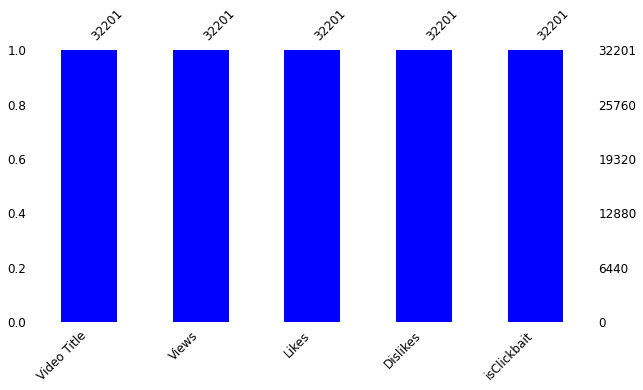

In [ ]:
msno.bar(data,color="blue", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

In [ ]:
data.nunique()

Video Title    32196
Views            200
Likes            200
Dislikes         196
isClickbait        2
dtype: int64

# Lower Case Conversion, Tokenization, StopWord Removal and Lemmatization

In [ ]:
#lower casing
data["Video Title"] = data["Video Title"].str.lower()
print(data["Video Title"])

2803     17 things you should know before trying to get...
29710      transcript of bin laden message released by abc
24185    2010 fifa world cup: spain beats chile; both g...
30581         mainers air their views on same-sex marriage
26276             running to reclaim your body from cancer
                               ...                        
23543    in olympic rerun, wanjiru captures london mara...
6199     24 words only  "how i met your mother" fans re...
21677               the disorder of conferring with russia
16511      brazil's embraer plans to cut around 4,200 jobs
22969                  canadian pm cabinet shuffle results
Name: Video Title, Length: 32201, dtype: object


In [ ]:
#removing extra spaces
data["Video Title"] = data["Video Title"].apply(lambda x: x.strip())
print(data["Video Title"])

2803     17 things you should know before trying to get...
29710      transcript of bin laden message released by abc
24185    2010 fifa world cup: spain beats chile; both g...
30581         mainers air their views on same-sex marriage
26276             running to reclaim your body from cancer
                               ...                        
23543    in olympic rerun, wanjiru captures london mara...
6199     24 words only  "how i met your mother" fans re...
21677               the disorder of conferring with russia
16511      brazil's embraer plans to cut around 4,200 jobs
22969                  canadian pm cabinet shuffle results
Name: Video Title, Length: 32201, dtype: object


In [ ]:
#removing stopwords
stop = stopwords.words('english')
data["Video Title"] = data["Video Title"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
data["Video Title"] #after removing stopwords

2803                 17 things know trying get bigger butt
29710            transcript bin laden message released abc
24185    2010 fifa world cup: spain beats chile; go sec...
30581                  mainers air views same-sex marriage
26276                          running reclaim body cancer
                               ...                        
23543      olympic rerun, wanjiru captures london marathon
6199      24 words "how met mother" fans really understand
21677                           disorder conferring russia
16511         brazil's embraer plans cut around 4,200 jobs
22969                  canadian pm cabinet shuffle results
Name: Video Title, Length: 32201, dtype: object

In [ ]:
#removing punctuations
###DONT REMOVE PUNCTUATIONS
def remove_punctuation(text):
    punt = "".join([i for i in text if i not in string.punctuation])
    return punt
data["Video Title"] = data["Video Title"].apply(lambda x: remove_punctuation(x))
#test_text = test_text.apply(lambda x: remove_punctuation(x))

In [ ]:
#removing numbers
# Don't remove numbers
def remove_digits(text):
    digits = "".join([i for i in text if not i.isdigit()])
    return digits
data["Video Title"] = data["Video Title"].apply(lambda x: remove_digits(x))
#test_text = test_text.apply(lambda x: remove_digits(x))

In [ ]:
import nltk
#lemmatization
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet
nltk.download('omw-1.4')
#data["Video Title"] =  data["Video Title"].apply(lambda sentence: ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)]))
#data["Video Title"] = data["Video Title"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
data["Video Title"] = data["Video Title"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)]))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
print(data["Video Title"])

2803                   thing know trying get bigger butt
29710          transcript bin laden message released abc
24185    fifa world cup spain beat chile go second round
30581                   mainer air view samesex marriage
26276                        running reclaim body cancer
                              ...                       
23543      olympic rerun wanjiru capture london marathon
6199           word how met mother fan really understand
21677                         disorder conferring russia
16511                 brazil embraer plan cut around job
22969                 canadian pm cabinet shuffle result
Name: Video Title, Length: 32201, dtype: object


In [ ]:
#creating seperate dataframes for each class
df_cb=data[data['isClickbait']==1]
df_noncb=data[data['isClickbait']==0]



#creating a list of unique words for each class
cb_list=list(df_cb['Video Title'])

total_vocab_cb = set()

for sent in cb_list:
    words=set([w for w in nltk.word_tokenize(sent)])
    total_vocab_cb.update(words)
len(total_vocab_cb)

#print(total_vocab_cb)

noncb_list=list(df_noncb['Video Title'])

total_vocab_noncb = set()
for sent in noncb_list:
    words=set([w for w in nltk.word_tokenize(sent)])
    total_vocab_noncb.update(words)
len(total_vocab_noncb)

flat_cb = [item for sublist in cb_list for item in nltk.word_tokenize(sublist)]
flat_noncb = [item for sublist in noncb_list for item in nltk.word_tokenize(sublist)]

print(flat_cb[0:100])
cb_freq = FreqDist(flat_cb)
noncb_freq = FreqDist(flat_noncb)

['thing', 'know', 'trying', 'get', 'bigger', 'butt', 'pastry', 'chef', 'match', 'treat', 'outfit', 'work', 'mini', 'peanut', 'butter', 'cheesecake', 'epitome', 'food', 'porn', 'thing', 'single', 'people', 'get', 'thing', 'would', 'never', 'see', 'kardashians', 'today', 'gifs', 'anyone', 'trying', 'get', 'life', 'order', 'relate', 'spiritual', 'level', 'beauty', 'product', 'ad', 'actually', 'honest', 'people', 'tried', 'salmon', 'cooked', 'dishwasher', 'try', 'control', 'yourself', 'sexiest', 'doctor', 'alive', 'giving', 'away', 'date', 'charity', 'well', 'actually', 'remember', 'halloweentown', 'thing', 'nobody', 'told', 'depression', 'rain', 'la', 'let', 'tarot', 'help', 'crush', 'cereal', 'cocktail', 'give', 'breakfast', 'deserve', 'accessory', 'look', 'exactly', 'like', 'favorite', 'food', 'well', 'know', 'lyric', 'second', 'summer', 'song', 'iconic', 'female', 'character', 'without', 'makeup', 'need', 'talk', 'mannequin', 'forever', 'tumblr', 'post']


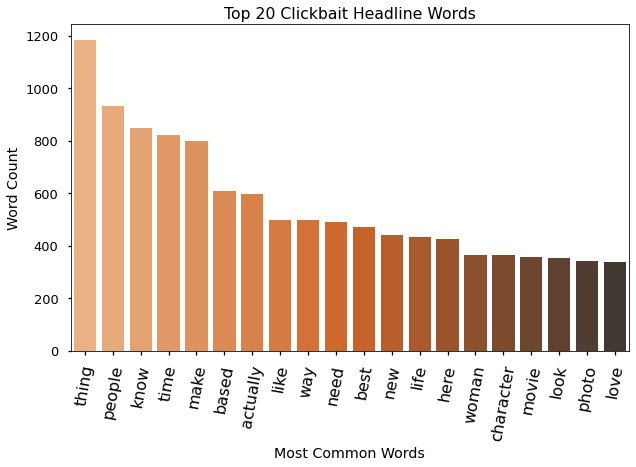

In [ ]:
# create counts of clickbait and non-clickbait words and values
cb_bar_counts = [x[1] for x in cb_freq.most_common(20)]
cb_bar_words = [x[0] for x in cb_freq.most_common(20)]

noncb_bar_counts = [x[1] for x in noncb_freq.most_common(20)]
noncb_bar_words = [x[0] for x in noncb_freq.most_common(20)]

plt.style.use('seaborn-talk')

#bar plot for top 15 most common clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(x=cb_bar_words, y=cb_bar_counts,palette='Oranges_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style('white')
plt.savefig('clickbait_20_bar')
plt.show()

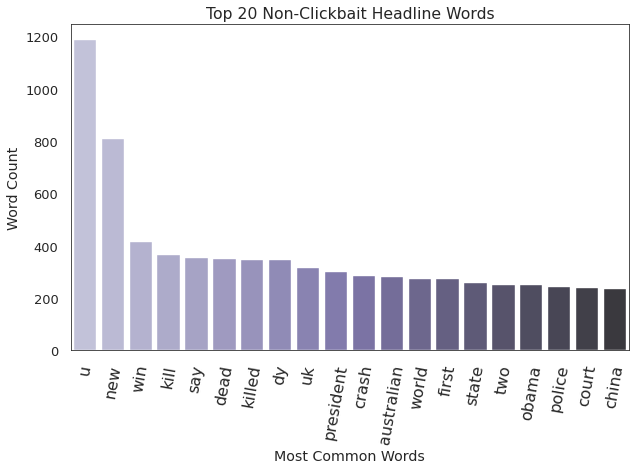

In [ ]:
#bar plot for top 15 most common non-clickbait words
word_freq_figure1 = plt.figure(figsize=(10,6))
sns.barplot(x=noncb_bar_words, y=noncb_bar_counts,palette='Purples_d')
plt.xticks(fontsize=16)
plt.xticks(rotation=80)
plt.title('Top 20 Non-Clickbait Headline Words')
plt.xlabel('Most Common Words')
plt.ylabel('Word Count')
sns.set_style()
plt.show()

In [ ]:
data.head()

,Video Title,Views,Likes,Dislikes,isClickbait
2803,thing know trying get bigger butt,-1,-1,-1,1
29710,transcript bin laden message released abc,-1,-1,-1,0
24185,fifa world cup spain beat chile go second round,-1,-1,-1,0
30581,mainer air view samesex marriage,-1,-1,-1,0
26276,running reclaim body cancer,-1,-1,-1,0


# Finding Unigram,Bigram and Trigram


In [ ]:
def get_top_n_words(corpus, n=None):
    vec = CV().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def get_top_n_trigram(corpus, n=None):
    vec = CV(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
def plot_bt(x,w,p):
    common_words = x(data["Video Title"], 20)
    common_words_df = DataFrame (common_words,columns=['word','freq'])

    plt.figure(figsize=(16,8))
    sns.barplot(x='freq', y='word', data=common_words_df,facecolor=(0, 0, 0, 0),linewidth=3,edgecolor=sns.color_palette(p,20))
    plt.title("Top 20 "+ w,)
    plt.xlabel("Frequency", fontsize=14)
    plt.yticks(fontsize=13)
    plt.xticks(rotation=45, fontsize=13)
    plt.ylabel("");
    return common_words_df

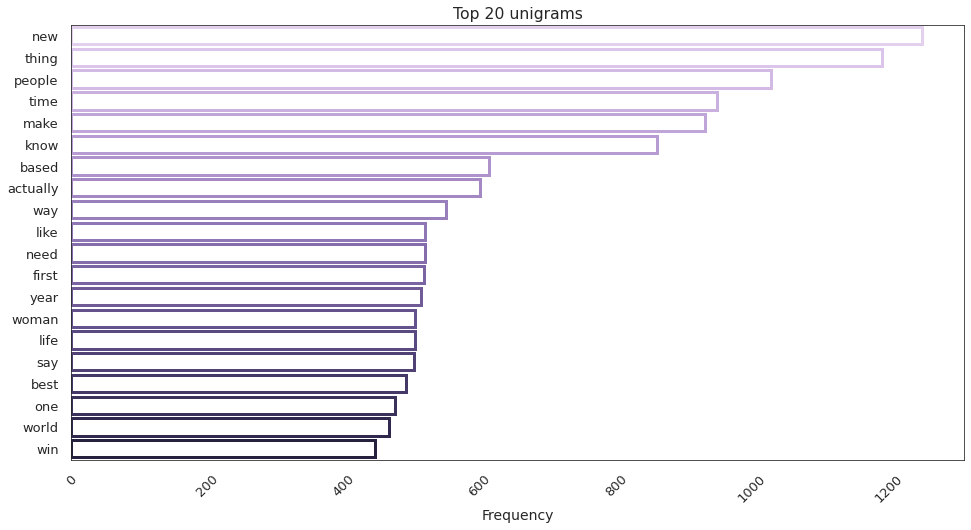

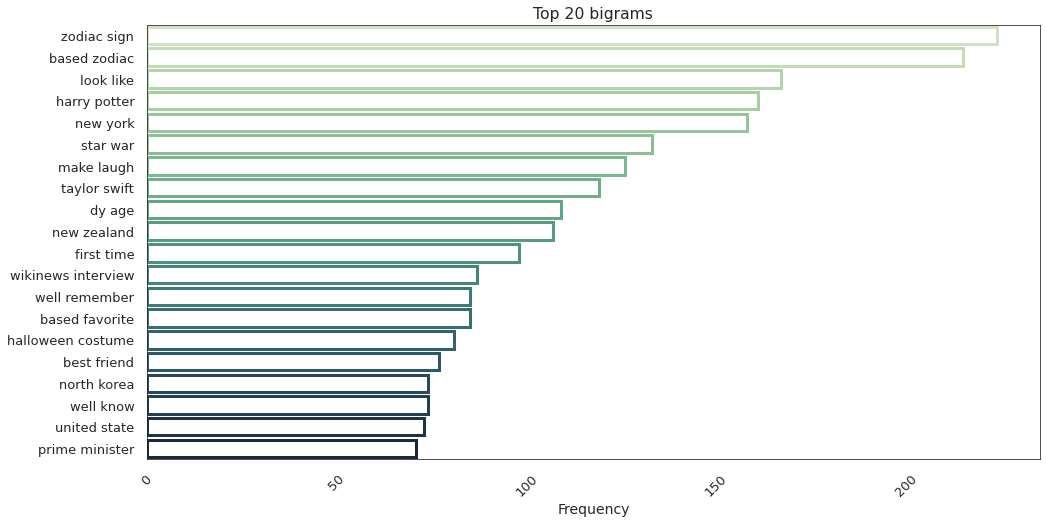

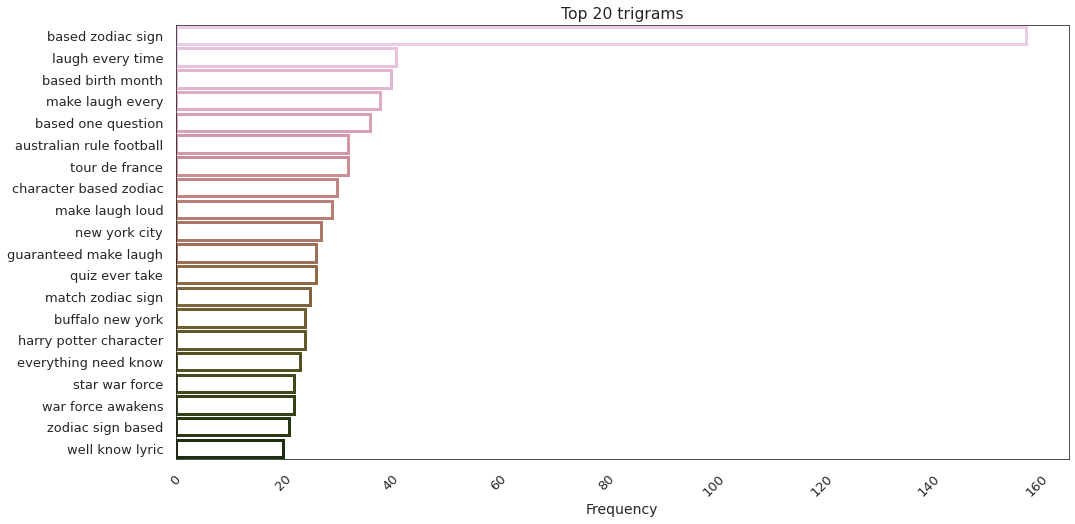

In [ ]:
common_words = get_top_n_words(data["Video Title"], 20)
common_words_df1 = DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='freq', y='word', data=common_words_df1,facecolor=(0, 0, 0, 0),linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",20))

plt.title("Top 20 unigrams")
plt.xlabel("Frequency", fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=13)
plt.ylabel("");

common_words_df2 = plot_bt(get_top_n_bigram,"bigrams","ch:rot=-.5")
common_words_df3 = plot_bt(get_top_n_trigram,"trigrams","ch:start=-1, rot=-.6")

# Word Cloud

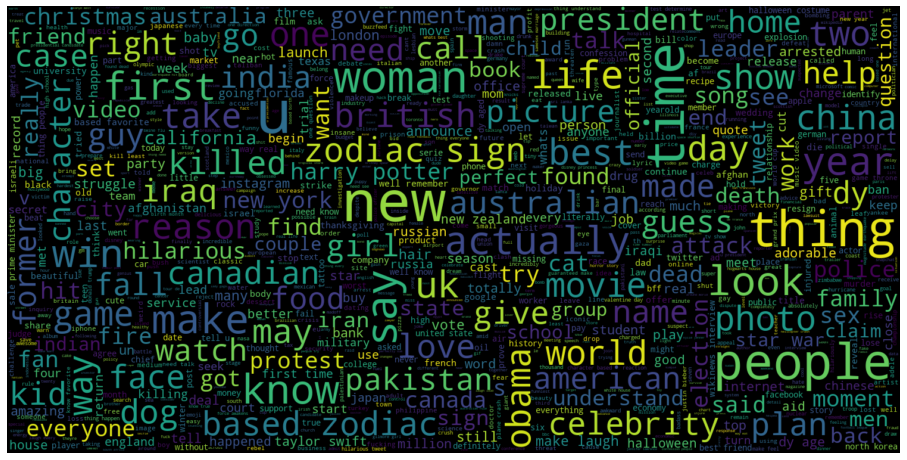

In [ ]:
# color function for the wordcloud
from wordcloud import WordCloud, STOPWORDS
plt.subplots(figsize=(16,16))
wc = WordCloud(stopwords=STOPWORDS,background_color="black",width=1500, height=750,max_words=1000, max_font_size=100)
wc.generate(' '.join(data["Video Title"]))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

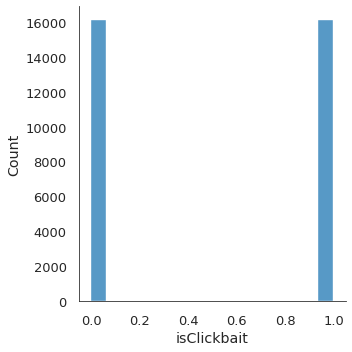

In [ ]:
sns.displot(data, x="isClickbait")

## Finding semantic and syntactic features

In [ ]:
print(data["Video Title"][24749])

clinton confirmation hearing raise concern funding husband foundation


In [ ]:
punclist=['!','#','?','.','$','@']
#No of punctuations
def count_punctuation(text):
    punt = "".join([i for i in text if i in punclist])
    return len(punt)
data["No_of_Punc"] = data["Video Title"].apply(lambda x: count_punctuation(x))

In [ ]:
#Mean length of title
def title_length(text):
  return len([x for x in text])
data["Title Length"]=data["Video Title"].apply(lambda x: title_length(x))

In [ ]:
#Views to likes ratio
data["Views to Likes"]=data["Views"]/data["Likes"]

In [ ]:
#views to dislikes
data["Views to Dislikes"]=data["Views"]/data["Dislikes"]
print(data.nunique(axis=0))

Video Title          32097
Views                  200
Likes                  200
Dislikes               196
isClickbait              2
No_of_Punc               1
Title Length           112
Views to Likes         200
Views to Dislikes      200
dtype: int64


In [ ]:
# import torch
# !pip install flair
# import flair

In [ ]:
print(data['Video Title'].isnull().sum())
data['Video Title'].dropna()

2


0                      thing know trying get bigger butt
1              transcript bin laden message released abc
2        fifa world cup spain beat chile go second round
3                       mainer air view samesex marriage
4                            running reclaim body cancer
                              ...                       
32196      olympic rerun wanjiru capture london marathon
32197          word how met mother fan really understand
32198                         disorder conferring russia
32199                 brazil embraer plan cut around job
32200                 canadian pm cabinet shuffle result
Name: Video Title, Length: 32199, dtype: object

In [ ]:
#sentiment score
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

def flair_prediction(x):
    x = str(x)
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return 2
    elif "NEGATIVE" in str(score):
        return 0
    else:
        return 1
data["Sentiment score"] = data["Video Title"].apply(flair_prediction)

2022-08-25 18:04:32,924 loading file /root/.flair/models/sentiment-en-mix-distillbert_4.pt


In [ ]:
print(data.head())

In [ ]:
# for clickbait data
print(flair_prediction("I feel very down today! Help Me!!!"))

# for non clickbait data
print(flair_prediction("Morning News India"))

0
2


In [ ]:
data=data.drop(['Views', 'Likes', 'Dislikes'], axis=1)

In [ ]:
data

,Video Title,isClickbait,No_of_Punc,Title Length,Views to Likes,Views to Dislikes,Sentiment score
0,thing know trying get bigger butt,1,0,33,1.0,1.0,2
1,transcript bin laden message released abc,0,0,41,1.0,1.0,0
2,fifa world cup spain beat chile go second round,0,0,47,1.0,1.0,2
3,mainer air view samesex marriage,0,0,32,1.0,1.0,2
4,running reclaim body cancer,0,0,27,1.0,1.0,0
...,...,...,...,...,...,...,...
32196,olympic rerun wanjiru capture london marathon,0,0,45,1.0,1.0,2
32197,word how met mother fan really understand,1,0,41,1.0,1.0,2
32198,disorder conferring russia,0,0,26,1.0,1.0,0
32199,brazil embraer plan cut around job,0,0,34,1.0,1.0,0


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
print(data.nunique(axis=0))

Video Title          32097
isClickbait              2
No_of_Punc               1
Title Length           112
Views to Likes         200
Views to Dislikes      200
dtype: int64


In [ ]:
data.to_csv("youtube_additional_features_1")
# !cp youtube_additional_features_1.csv '/content/drive'

In [ ]:
!cp youtube_additional_features_1.csv '/content/drive'

##Training Models

In [ ]:
data=pd.read_csv("/content/youtube_additional_features_1")

In [ ]:
data

In [ ]:
#definining y and features
stopwords_list = stopwords.words('english')
features = data.drop(columns='isClickbait')
y = data['isClickbait']

X_train, X_test, y_train, y_test = train_test_split(features, y, random_state=20)
originalTest = X_test
originalTrain = X_train

tfidf = TfidfVectorizer(stop_words = stopwords_list,ngram_range = (1,2))
tfidf_text_train = tfidf.fit_transform(X_train['Video Title'].values.astype('U'))
tfidf_text_test = tfidf.transform(X_test['Video Title'].values.astype('U'))

X_train_ef = X_train.drop(columns='Video Title')
X_test_ef = X_test.drop(columns='Video Title')

In [ ]:
#combine tf-idf vectors with the engineered features and store as sparse arrays
from scipy import sparse

X_train = sparse.hstack([X_train_ef, tfidf_text_train]).tocsr()
X_test = sparse.hstack([X_test_ef, tfidf_text_test]).tocsr()

In [ ]:
print(X_train.shape)
print(X_test.shape)

(24150, 110451)
(8051, 110451)


In [ ]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_ML(title, views, likes, dislikes):
  title = title.lower()
  title = title.strip()
  title = " ".join([w for w in title.split() if w not in stop])
  title = " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(title)])
  no_of_punc = count_punctuation(title)
  title_len = title_length(title)
  views_to_like = views / likes
  views_to_dislike = views / dislikes
  sent_score = flair_prediction(title)

  info = [no_of_punc, title_len, views_to_like, views_to_dislike, sent_score]

  tfidf_title = tfidf.transform([title])

  final = sparse.hstack([info, tfidf_title]).tocsr()

  return final

##Naive Bayes

In [ ]:
nb_classifier = MultinomialNB(alpha = .05)

nb_classifier.fit(X_train, y_train)

nb_train_preds = nb_classifier.predict(X_train)
nb_test_preds = nb_classifier.predict(X_test)

print(nb_test_preds, X_test[0])

score1 = metrics.accuracy_score(y_train, nb_train_preds)
print("Train accuracy:",score1)
score1 = metrics.accuracy_score(y_test, nb_test_preds)
print("Test accuracy:",score1)

print(metrics.classification_report(y_test, nb_test_preds))

print(metrics.confusion_matrix(y_test, nb_test_preds))

[0 1 1 ... 1 0 0]   (0, 1)	62.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 12642)	0.31645354795405983
  (0, 25448)	0.38519781026108235
  (0, 29145)	0.345041561875421
  (0, 32053)	0.2963146403804573
  (0, 48524)	0.4253540586467438
  (0, 70348)	0.39497702941121415
  (0, 77969)	0.4557310878822734
Train accuracy: 0.9864182194616977
Test accuracy: 0.8878400198733076
              precision    recall  f1-score   support

           0       0.98      0.79      0.87      3970
           1       0.83      0.99      0.90      4081

    accuracy                           0.89      8051
   macro avg       0.90      0.89      0.89      8051
weighted avg       0.90      0.89      0.89      8051

[[3118  852]
 [  51 4030]]


In [ ]:
#clickbait
title = "5 minute hacks to get rich"
views = 5000
likes = 150
dislikes = 1000

#non-clickbait
titleN = "punkt"
viewsN = 41996418
likesN = 2900000
dislikesN = 1000

print(nb_classifier.predict(preprocess_ML(title, views, likes, dislikes)))
print(nb_classifier.predict(preprocess_ML(titleN, viewsN, likesN, dislikesN)))

[1]
[0]


In [ ]:
for i in range(2, 6):
  print(originalTrain["Video Title"][i] + " " + str(nb_train_preds[i]))


fifa world cup spain beat chile go second round 1
mainer air view samesex marriage 1
running reclaim body cancer 1
pastry chef match treat outfit work 0


##RandomForest

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = 'balanced', n_estimators=100, )
rf_classifier.fit(X_train, y_train)

rf_test_preds = rf_classifier.predict(X_test)
rf_train_preds = rf_classifier.predict(X_train)

score1 = metrics.accuracy_score(y_train, rf_train_preds)
print("Train accuracy:",score1)
score1 = metrics.accuracy_score(y_test, rf_test_preds)
print("Test accuracy:",score1)

print(metrics.classification_report(y_test, rf_test_preds))


print(metrics.confusion_matrix(y_test, rf_test_preds))

Train accuracy: 1.0
Test accuracy: 0.9161594832940008
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3970
           1       0.90      0.94      0.92      4081

    accuracy                           0.92      8051
   macro avg       0.92      0.92      0.92      8051
weighted avg       0.92      0.92      0.92      8051

[[3528  442]
 [ 233 3848]]


In [ ]:
#clickbait
title = "5 minute hacks to get rich"
views = 5000
likes = 150
dislikes = 1000

#non-clickbait
titleN = "punkt"
viewsN = 41996418
likesN = 2900000
dislikesN = 1000

print(nb_classifier.predict(preprocess_ML(title, views, likes, dislikes)))
print(nb_classifier.predict(preprocess_ML(titleN, viewsN, likesN, dislikesN)))

[1]
[0]


In [ ]:
for i in range(2, 6):
  print(originalTrain["Video Title"][i] + " " + str(rf_train_preds[i]))

fifa world cup spain beat chile go second round 1
mainer air view samesex marriage 1
running reclaim body cancer 1
pastry chef match treat outfit work 0


##SVM

In [ ]:
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(class_weight='balanced', C=10, max_iter = 1500 )

#training
svm_classifier.fit(X_train, y_train)

svm_test_preds = svm_classifier.predict(X_test)
svm_train_preds = svm_classifier.predict(X_train)

score1 = metrics.accuracy_score(y_train, svm_train_preds)
print("Train accuracy:",score1)
score1 = metrics.accuracy_score(y_test, svm_test_preds)
print("Test accuracy:",score1)

print(metrics.classification_report(y_test, svm_test_preds))

print(metrics.confusion_matrix(y_test, svm_test_preds))

Train accuracy: 0.9972256728778468
Test accuracy: 0.9530493106446404
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3970
           1       0.94      0.97      0.95      4081

    accuracy                           0.95      8051
   macro avg       0.95      0.95      0.95      8051
weighted avg       0.95      0.95      0.95      8051

[[3717  253]
 [ 125 3956]]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
for i in range(2, 6):
  print(originalTrain["Video Title"][i] + " " + str(svm_train_preds[i]))

fifa world cup spain beat chile go second round 1
mainer air view samesex marriage 1
running reclaim body cancer 1
pastry chef match treat outfit work 0


##BERT 

In [ ]:
sen_w_feats = []
labels = []
 
# replacing the NaN values with empty string.
data = data.fillna("")


print('Combining features into strings')

for index, row in data.iterrows():

    # Piece it together...    
    combined = ""
    
   
    combined += "{:} {:} {:} {:} {:} {:} ".format(row["Video Title"], 
                                                       row["Title Length"],
                                                       row["No_of_Punc"], 
                                                       row["Views to Likes"], 
                                                       row["Views to Dislikes"], 
                                                       row["Sentiment score"])
    
    #Adding the combined text to the list.
    sen_w_feats.append(combined)

    #Adding the label to labels list
    labels.append(row["isClickbait"])

print('Dataset contains {:,} samples.'.format(len(sen_w_feats)))

Combining features into strings
Dataset contains 32,201 samples.


In [ ]:
#viz result
import textwrap

# Wrap text to 80 characters.
wrapper = textwrap.TextWrapper(width=80) 

print(wrapper.fill(sen_w_feats[100]))

general lose globetrotter everyone win 38 0 1.0 1.0 2


In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)


Loading BERT tokenizer...


In [ ]:
from transformers import BertForSequenceClassification

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
)

# Tell pytorch to run this model on the GPU.
desc = model.cuda()

In [ ]:
# Larger batch sizes tend to be better, and we can fit this in memory.
batch_size = 32

learning_rate = 1e-5

# Number of training epochs. 
epochs = 2

In [ ]:
max_len = 0

# For every sentence...
for sent in sen_w_feats:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent, add_special_tokens=True)

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)
max_len = 70

Max sentence length:  51


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

print('Encoding all reviews in the dataset...')

# For every sentence...
for sent in sen_w_feats:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = max_len,           # Pad & truncate all sentences.
                        truncation = True,
                        padding = 'max_length',
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

print('DONE.')
print(tokenizer.convert_ids_to_tokens(encoded_dict['input_ids'][0]))

Encoding all reviews in the dataset...
DONE.
['[CLS]', 'canadian', 'pm', 'cabinet', 'shuffle', 'result', '34', '0', '1', '.', '0', '1', '.', '0', '0', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']


In [ ]:
import random
import numpy as np

# First, calculate the split sizes. 80% training, 10% validation, 10% test.
train_size = int(0.8 * len(data))
val_size = int(0.1 * len(data))
test_size = len(data) - (train_size + val_size)

# Sanity check the sizes.
assert((train_size + val_size + test_size) == len(data))

# Create a list of indeces for all of the samples in the dataset.
indeces = np.arange(0, len(data))

# Shuffle the indeces randomly.
random.shuffle(indeces)

# Get a list of indeces for each of the splits.
train_idx = indeces[0:train_size]
val_idx = indeces[train_size:(train_size + val_size)]
test_idx = indeces[(train_size + val_size):]

print('  Training size: {:,}'.format(train_size))
print('Validation size: {:,}'.format(val_size))
print('      Test size: {:,}'.format(test_size))

  Training size: 25,760
Validation size: 3,220
      Test size: 3,221


In [ ]:
from torch.utils.data import TensorDataset

# Split the samples, and create TensorDatasets for each split. 
train_dataset = TensorDataset(input_ids[train_idx], attention_masks[train_idx], labels[train_idx])
val_dataset = TensorDataset(input_ids[val_idx], attention_masks[val_idx], labels[val_idx])
test_dataset = TensorDataset(input_ids[test_idx], attention_masks[test_idx], labels[test_idx])

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler


train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [ ]:
from transformers import AdamW

optimizer = torch.optim.AdamW(model.parameters(),
                  lr = learning_rate, 
                  eps = 1e-8 
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:
  # Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)


training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
   
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

      
        model.zero_grad()        

        result = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels,
                       return_dict=True)

        loss = result.loss
        logits = result.logits

     
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

      
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
  
    # Validation
   
    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
     
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        
        with torch.no_grad():        

        
            result = model(b_input_ids, 
                           token_type_ids=None, 
                           attention_mask=b_input_mask,
                           labels=b_labels,
                           return_dict=True)

        loss = result.loss
        logits = result.logits
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

       
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
Training...
  Batch    40  of    805.    Elapsed: 0:00:13.
  Batch    80  of    805.    Elapsed: 0:00:26.
  Batch   120  of    805.    Elapsed: 0:00:38.
  Batch   160  of    805.    Elapsed: 0:00:50.
  Batch   200  of    805.    Elapsed: 0:01:02.
  Batch   240  of    805.    Elapsed: 0:01:14.
  Batch   280  of    805.    Elapsed: 0:01:26.
  Batch   320  of    805.    Elapsed: 0:01:39.
  Batch   360  of    805.    Elapsed: 0:01:51.
  Batch   400  of    805.    Elapsed: 0:02:03.
  Batch   440  of    805.    Elapsed: 0:02:15.
  Batch   480  of    805.    Elapsed: 0:02:28.
  Batch   520  of    805.    Elapsed: 0:02:40.
  Batch   560  of    805.    Elapsed: 0:02:52.
  Batch   600  of    805.    Elapsed: 0:03:04.
  Batch   640  of    805.    Elapsed: 0:03:16.
  Batch   680  of    805.    Elapsed: 0:03:28.
  Batch   720  of    805.    Elapsed: 0:03:40.
  Batch   760  of    805.    Elapsed: 0:03:52.
  Batch   800  of    805.    Elapsed: 0:04:04.

  Average traini

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')


df_stats

,Training Loss,Valid. Loss,Valid. Accur.,Training Time,Validation Time
epoch,,,,,
1,0.18,0.1,0.96,0:04:06,0:00:10
2,0.08,0.1,0.97,0:04:02,0:00:10


In [ ]:
# Create a DataLoader to batch our test samples
prediction_sampler = SequentialSampler(test_dataset)
prediction_dataloader = DataLoader(test_dataset, sampler=prediction_sampler, batch_size=batch_size)

print('Predicting labels for {:,} test sentences...'.format(len(test_dataset)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 


for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask,
                    return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

Predicting labels for 3,221 test sentences...
    DONE.


In [ ]:
# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

In [ ]:

score1 = metrics.accuracy_score(flat_true_labels, flat_predictions)
print("Test accuracy:",score1)

print(metrics.classification_report(flat_true_labels, flat_predictions))
print(metrics.confusion_matrix(flat_true_labels, flat_predictions))

#print('F1 Score: %.3f' % f1)

Test accuracy: 0.9587084756286868
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1598
           1       0.95      0.97      0.96      1623

    accuracy                           0.96      3221
   macro avg       0.96      0.96      0.96      3221
weighted avg       0.96      0.96      0.96      3221

[[1521   77]
 [  56 1567]]


In [ ]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def preprocess_test(title, views, likes, dislikes):
  title = title.lower()
  title = title.strip()
  title = " ".join([w for w in title.split() if w not in stop])
  title = " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(title)])
  no_of_punc = count_punctuation(title)
  title_len = title_length(title)
  views_to_like = views / likes
  views_to_dislike = views / dislikes
  sent_score = flair_prediction(title)

  merged_data = ""
  merged_data += "{:} {:} {:} {:} {:} {:} ".format(title, 
                                                       title_len,
                                                       no_of_punc, 
                                                       views_to_like, 
                                                       views_to_dislike, 
                                                       sent_score)
  return merged_data